## Реализация 1-й и 2-й производных в виде функторов

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Derivative1st:
    def __init__(self, function, step):
        self._function = function
        self._step = float(step)
        
    def __call__(self, x):
        h, f = self._step, self._function
        return 1./(2.*h) * (f(x + h) - f(x - h))
    

class Derivative2nd(Derivative1st):
    def __init__(self, function, step):
        self._function = Derivative1st(function, step)
        self._step = float(step)

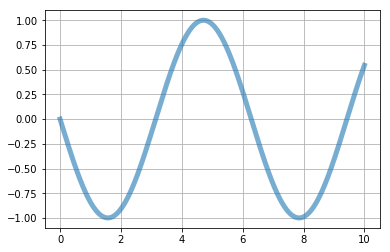

In [9]:
derivative2nd = Derivative1st(Derivative1st(m.sin, step=1e-4), step=1e-4)


xData = np.linspace(0., 10., 400)
yData = [derivative2nd(x) for x in xData] # f1(x) == f1.__call__(x)

plt.figure()
plt.plot(xData, yData, linewidth=5, alpha=0.6)
plt.grid('on')
plt.show()

## Попытка создания класса для реализации k-й производной фукнкции

In [31]:
class Derivative:
    def __init__(self, function, step=1e-4):
        self._function = function
        self._step = float(step)
        
    def __call__(self, x):
        h, f = self._step, self._function
        return 1./(2.*h) * (f(x + h) - f(x - h))
    

class DerivativeHighOrder:
    def __init__(self, order, function, step=1e-4):
        self._function = function
        self._step = float(step)
        
        derivativeTmp = self._function
        for k in range(order):
            derivativeTmp = Derivative(derivativeTmp, step)
            print('Differentiation "done"')
        self._derivativeFinal = derivativeTmp
    
    def __call__(self, x):
        return self._derivativeFinal(x)

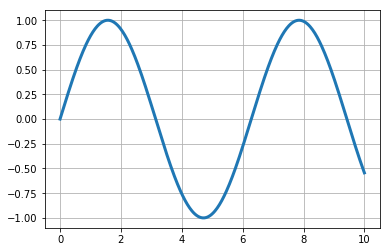

In [36]:
# testing the functors via plotting
xData = np.linspace(0., 10., 400)
orderMAX = 1

derivativesList = [DerivativeHighOrder(order, m.sin, step=1e-2) for order in range(orderMAX)]

plt.figure()                   
for function in derivativesList:
    yData = [function(x) for x in xData] # f1(x) == f1.__call__(x)
    plt.plot(xData, yData, linewidth=3)
    plt.grid('on')
plt.show()

## Частные производные: один из вариантов реализации
Идея: занумеровать аргументы функции многих переменных

In [40]:
# TODO, a lot
class PartialDerivative:
    def __init__(self, functionXY, stepXY=1e-2):
        self._functionXY = functionXY
        self._stepXY = float(stepXY)
        
    def __call__(self, x, y, varNumber): # x, y -> list(x1,x2,...,xN)
        h, f = self._stepXY, self._functionXY
        
        point = np.asarray([x, y]); 
        delta = np.zeros(2); delta[varNumber] = h
        pointPlusDelta... # TODO
        
        return 1./(2.*h) * (f(point + delta) - f(point - delta))

In [42]:
# testing
pdX = PartialDerivative(lambda x, y: np.sin(np.cos(x**y)))
pdX(0.8, 0.8, 1)

TypeError: <lambda>() missing 1 required positional argument: 'y'